In [13]:
import pandas as pd
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [14]:
df1_21_1 = pd.read_excel(r"C:\Users\KMAC\Desktop\한국능률협회컨설팅_종엽\수요예측 부문 데이터\1. 수요예측 부문\중소유통물류센터 거래 데이터\(1 데이터) 유통데이터 활용 경진대회 배포용.xlsx", sheet_name='2021_01~06')
df1_21_2 = pd.read_excel(r"C:\Users\KMAC\Desktop\한국능률협회컨설팅_종엽\수요예측 부문 데이터\1. 수요예측 부문\중소유통물류센터 거래 데이터\(1 데이터) 유통데이터 활용 경진대회 배포용.xlsx", sheet_name='2021_07~12')
df1_22_1 = pd.read_excel(r"C:\Users\KMAC\Desktop\한국능률협회컨설팅_종엽\수요예측 부문 데이터\1. 수요예측 부문\중소유통물류센터 거래 데이터\(1 데이터) 유통데이터 활용 경진대회 배포용.xlsx", sheet_name='2022_01~06')
df1_22_2 = pd.read_excel(r"C:\Users\KMAC\Desktop\한국능률협회컨설팅_종엽\수요예측 부문 데이터\1. 수요예측 부문\중소유통물류센터 거래 데이터\(1 데이터) 유통데이터 활용 경진대회 배포용.xlsx", sheet_name='2022_07~12')
df1_23_1 = pd.read_excel(r"C:\Users\KMAC\Desktop\한국능률협회컨설팅_종엽\수요예측 부문 데이터\1. 수요예측 부문\중소유통물류센터 거래 데이터\(1 데이터) 유통데이터 활용 경진대회 배포용.xlsx", sheet_name='2023_01~06')
df1_23_2 = pd.read_excel(r"C:\Users\KMAC\Desktop\한국능률협회컨설팅_종엽\수요예측 부문 데이터\1. 수요예측 부문\중소유통물류센터 거래 데이터\(1 데이터) 유통데이터 활용 경진대회 배포용.xlsx", sheet_name='2023_07~12')

df2_21 = pd.read_excel(r"C:\Users\KMAC\Desktop\한국능률협회컨설팅_종엽\수요예측 부문 데이터\1. 수요예측 부문\중소유통물류센터 거래 데이터\(2 데이터) 유통데이터 활용 경진대회 배포용.xlsx", sheet_name='2021')
df2_22 = pd.read_excel(r"C:\Users\KMAC\Desktop\한국능률협회컨설팅_종엽\수요예측 부문 데이터\1. 수요예측 부문\중소유통물류센터 거래 데이터\(2 데이터) 유통데이터 활용 경진대회 배포용.xlsx", sheet_name='2022')
df2_23 = pd.read_excel(r"C:\Users\KMAC\Desktop\한국능률협회컨설팅_종엽\수요예측 부문 데이터\1. 수요예측 부문\중소유통물류센터 거래 데이터\(2 데이터) 유통데이터 활용 경진대회 배포용.xlsx", sheet_name='2023')

In [15]:
import sqlite3

In [16]:
# SQLite 데이터베이스 연결
conn = sqlite3.connect(':memory:')  # 메모리 내 데이터베이스 생성

# 데이터프레임을 SQL 테이블로 변환
df1_21_1.to_sql('df1_21_1', conn, index=False, if_exists='replace')
df1_21_2.to_sql('df1_21_2', conn, index=False, if_exists='replace')
df1_22_1.to_sql('df1_22_1', conn, index=False, if_exists='replace')
df1_22_2.to_sql('df1_22_2', conn, index=False, if_exists='replace')
df1_23_1.to_sql('df1_23_1', conn, index=False, if_exists='replace')
df1_23_2.to_sql('df1_23_2', conn, index=False, if_exists='replace')

df2_21.to_sql('df2_21', conn, index=False, if_exists='replace')
df2_22.to_sql('df2_22', conn, index=False, if_exists='replace')
df2_23.to_sql('df2_23', conn, index=False, if_exists='replace')

197873

In [32]:
# SQL 쿼리
query_u1 = '''
SELECT *
FROM (
SELECT *
FROM df1_21_1
UNION
SELECT *
FROM df1_21_2
UNION
SELECT *
FROM df1_22_1
UNION
SELECT *
FROM df1_22_2
UNION
SELECT *
FROM df1_23_1
UNION
SELECT *
FROM df1_23_2
)
'''

# 쿼리 실행 및 결과를 데이터프레임으로 변환
union_df1 = pd.read_sql_query(query_u1, conn)

# 결과 출력
union_df1

,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
0,2021-01-04 00:00:00,매출,37542,8,1,BX,12입,12,1.880110e+13,오츠카]포카리<1.5L>,식품,"생수,음료,건강",None
1,2021-01-04 00:00:00,매출,37542,8,1,BX,24입,24,2.818830e+12,롯데]칠성사이다(병) <340ml>,식품,"생수,음료,건강",None
2,2021-01-04 00:00:00,매출,37542,8,1,BX,3팩*8,1,1.880475e+13,모나리자]콤비280매,비식품,화장지류,None
3,2021-01-04 00:00:00,매출,37542,8,1,CS,1입,1,1.701001e+12,메밀가루400g,식품,가공식품류,분말류등
4,2021-01-04 00:00:00,매출,37542,8,1,CS,2000*10,10,8.809081e+12,꾸이맨300g,식품,가공식품류,"견과,안주류"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034460,2023-12-29 00:00:00,반품,37886,104,5,CS,6입,6,8.809274e+12,가야산천년수<2L>,식품,"생수,음료,건강",None
1034461,2023-12-29 00:00:00,반품,37930,222,1,BX,12입,12,1.880112e+13,오리온]스윙칩볶음고추장L<110g>,식품,"과자,씨리얼,초코릿,빵류",None
1034462,2023-12-29 00:00:00,반품,37930,222,1,BX,20입,20,2.880112e+13,오리온]오징어땅콩L<180g>,식품,"과자,씨리얼,초코릿,빵류",None
1034463,2023-12-29 00:00:00,반품,37931,85,1,CS,6입,6,8.888022e+12,건전지]에너자이저맥스<D>케이스,비식품,잡화,건전지


In [33]:
# SQL 쿼리
query_u2 = '''
SELECT *
FROM (
SELECT *
FROM df2_21
UNION
SELECT *
FROM df2_22
UNION
SELECT *
FROM df2_23
)
'''

# 쿼리 실행 및 결과를 데이터프레임으로 변환
union_df2 = pd.read_sql_query(query_u2, conn)

# 결과 출력
union_df2

,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
0,2021-01-31 00:00:00,매출,17954,201923,1,EA,4,1,8.801037e+12,(동서식품)맥심모카골드믹스300T(맥심50호),"음료,차류",음료,커피믹스
1,2021-01-31 00:00:00,매출,27140,201208,1,CS,12,12,1.888647e+13,프링글스양파맛110g,빵.케익.과자류,과자류,스낵류
2,2021-01-31 00:00:00,매출,27140,201208,1,CS,16,16,8.801043e+12,(농심)새우탕큰사발115g,면류.라면류,라면류,용기라면
3,2021-01-31 00:00:00,매출,27140,201208,1,CS,16,16,8.801043e+12,(농심)육개장큰사발110g,면류.라면류,라면류,용기라면
4,2021-01-31 00:00:00,매출,27140,201208,1,CS,4,4,1.880110e+13,(피죤)피죤블루비앙카리필2.1L+2.1L,일상용품,세제용품,유연제
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593145,2023-12-30 00:00:00,반품,51730,200673,18,EA,18,1,8.801008e+12,(CJ)비비고소고기미역국500g,가공식품류,레토르트식품,기타레토르트식품
593146,2023-12-30 00:00:00,반품,51730,200673,20,EA,1,1,8.809274e+12,(하이얏트)가야산천년수2L*6,"음료,차류",음료,생수
593147,2023-12-30 00:00:00,반품,51730,200673,20,EA,10,1,8.801037e+12,(동서식품)카누다크아메리카노10T미니,"음료,차류",음료,커피믹스
593148,2023-12-30 00:00:00,반품,51730,200673,20,EA,10,1,8.801037e+12,(동서식품)카누마일드로스트아메리카노10T미니,"음료,차류",음료,커피믹스


In [34]:
union_df1.to_sql('union_df1', conn, index=False, if_exists='replace')
union_df2.to_sql('union_df2', conn, index=False, if_exists='replace')

593150

In [35]:
my_report = sv.analyze(union_df1)
my_report = sv.analyze(union_df1, target_feat='판매수량')
my_report.show_html(r"C:\Users\KMAC\Desktop\한국능률협회컨설팅_종엽\유통데이터 활용 경진대회\유통데이터1_report.html") 

                                             |                                             | [  0%]   00:00 ->…

C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  figure.savefig(as_raw_bytes, format=

                                             |                                             | [  0%]   00:00 ->…

C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  figure.savefig(as_raw_bytes, format=

Report C:\Users\KMAC\Desktop\한국능률협회컨설팅_종엽\유통데이터 활용 경진대회\유통데이터1_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [36]:
my_report = sv.analyze(union_df2)
my_report = sv.analyze(union_df2, target_feat='판매수량')
my_report.show_html(r"C:\Users\KMAC\Desktop\한국능률협회컨설팅_종엽\유통데이터 활용 경진대회\유통데이터2_report.html") 

                                             |                                             | [  0%]   00:00 ->…

C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  figure.savefig(as_raw_bytes, format=

                                             |                                             | [  0%]   00:00 ->…

C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
C:\Users\KMAC\anaconda3\Lib\site-packages\sweetviz\graph.py:33: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  figure.savefig(as_raw_bytes, format=

Report C:\Users\KMAC\Desktop\한국능률협회컨설팅_종엽\유통데이터 활용 경진대회\유통데이터2_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [37]:
# SQL 쿼리
query_m = '''
SELECT strftime('%Y년 %m월', 판매일) AS 판매월, SUM(판매수량) AS 총판매수량
FROM union_df1
GROUP BY 판매월
ORDER BY 판매월 
'''

# 쿼리 실행 및 결과를 데이터프레임으로 변환
monthlysum_df1 = pd.read_sql_query(query_m, conn)

# 결과 출력
monthlysum_df1

,판매월,총판매수량
0,2021년 01월,107887
1,2021년 02월,108552
2,2021년 03월,119221
3,2021년 04월,116162
4,2021년 05월,126655
5,2021년 06월,132842
6,2021년 07월,141906
7,2021년 08월,130833
8,2021년 09월,119383
9,2021년 10월,138924


In [38]:
# SQL 쿼리
query_m = '''
SELECT strftime('%Y년 %m월', 판매일) AS 판매월, COUNT(판매수량) AS 총발주수
FROM union_df1
GROUP BY 판매월
ORDER BY 판매월 
'''

# 쿼리 실행 및 결과를 데이터프레임으로 변환
monthlycnt_df1 = pd.read_sql_query(query_m, conn)

# 결과 출력
monthlycnt_df1

,판매월,총발주수
0,2021년 01월,25490
1,2021년 02월,25322
2,2021년 03월,28373
3,2021년 04월,28536
4,2021년 05월,29196
5,2021년 06월,29602
6,2021년 07월,30958
7,2021년 08월,30943
8,2021년 09월,30125
9,2021년 10월,31177


In [89]:
# SQL 쿼리
query_m2 = '''
SELECT strftime('%Y년 %m월', 판매일) AS 판매월, SUM(판매수량) AS 총판매수량
FROM union_df2
GROUP BY 판매월
ORDER BY 판매월 
'''

# 쿼리 실행 및 결과를 데이터프레임으로 변환
monthlysum_df2 = pd.read_sql_query(query_m2, conn)

# 결과 출력
monthlysum_df2

,판매월,총판매수량
0,2021년 01월,81974
1,2021년 02월,75078
2,2021년 03월,92353
3,2021년 04월,91743
4,2021년 05월,90401
5,2021년 06월,104171
6,2021년 07월,117389
7,2021년 08월,106819
8,2021년 09월,101311
9,2021년 10월,101056


In [90]:
# SQL 쿼리
query_m2 = '''
SELECT strftime('%Y년 %m월', 판매일) AS 판매월, COUNT(판매수량) AS 총발주수
FROM union_df2
GROUP BY 판매월
ORDER BY 판매월 
'''

# 쿼리 실행 및 결과를 데이터프레임으로 변환
monthlycnt_df2 = pd.read_sql_query(query_m2, conn)

# 결과 출력
monthlycnt_df2

,판매월,총발주수
0,2021년 01월,15405
1,2021년 02월,13727
2,2021년 03월,17054
3,2021년 04월,15829
4,2021년 05월,16268
5,2021년 06월,16971
6,2021년 07월,18081
7,2021년 08월,17562
8,2021년 09월,18582
9,2021년 10월,17644


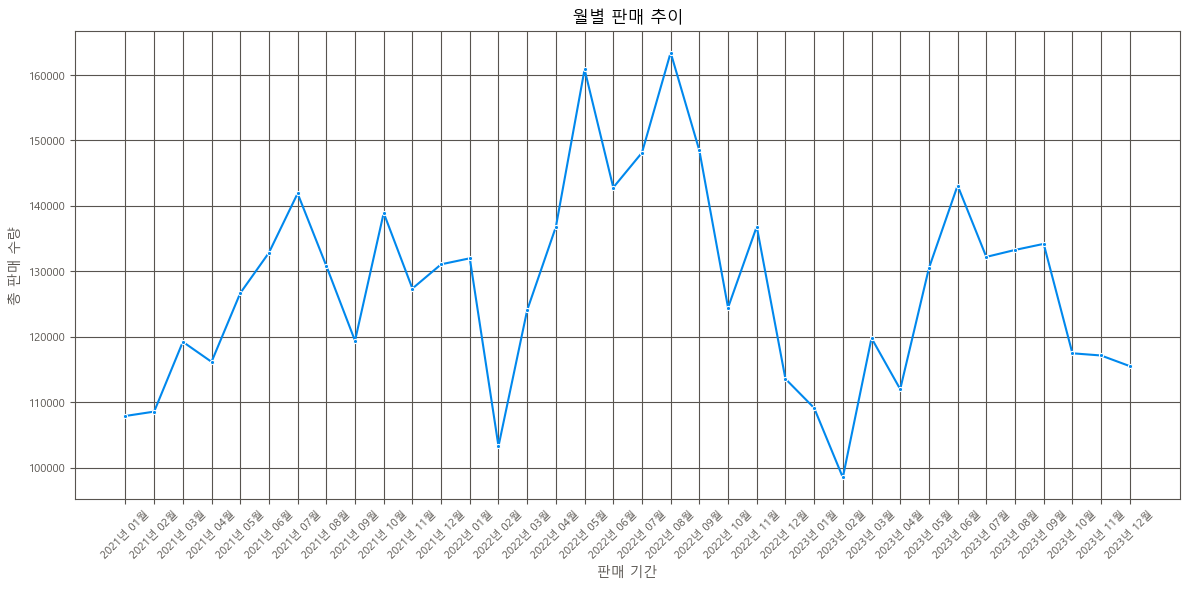

In [45]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthlysum_df1, x='판매월', y='총판매수량', marker='o')
plt.title('월별 판매 추이')
plt.xlabel('판매 기간')
plt.ylabel('총 판매 수량')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid()
plt.tight_layout()
plt.show()

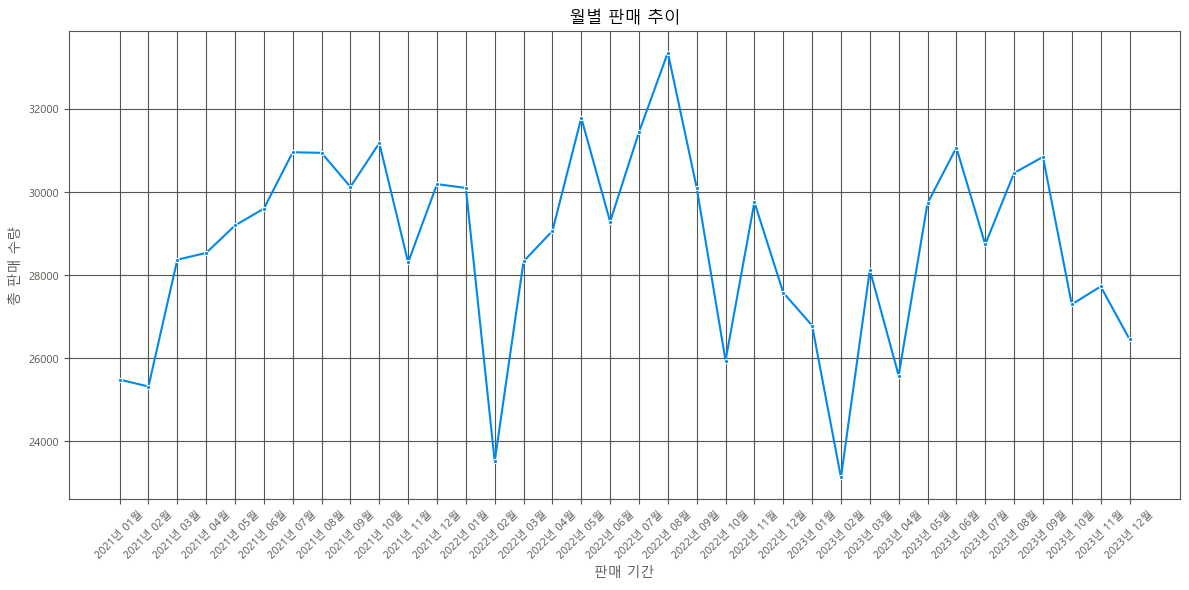

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthlycnt_df1, x='판매월', y='총발주수', marker='o')
plt.title('월별 판매 추이')
plt.xlabel('판매 기간')
plt.ylabel('총 판매 수량')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\KMAC\AppData\Local\Temp\ipykernel_11132\2257808572.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(monthlysum_df1['판매월'], rotation=45)  # x축 레이블 회전


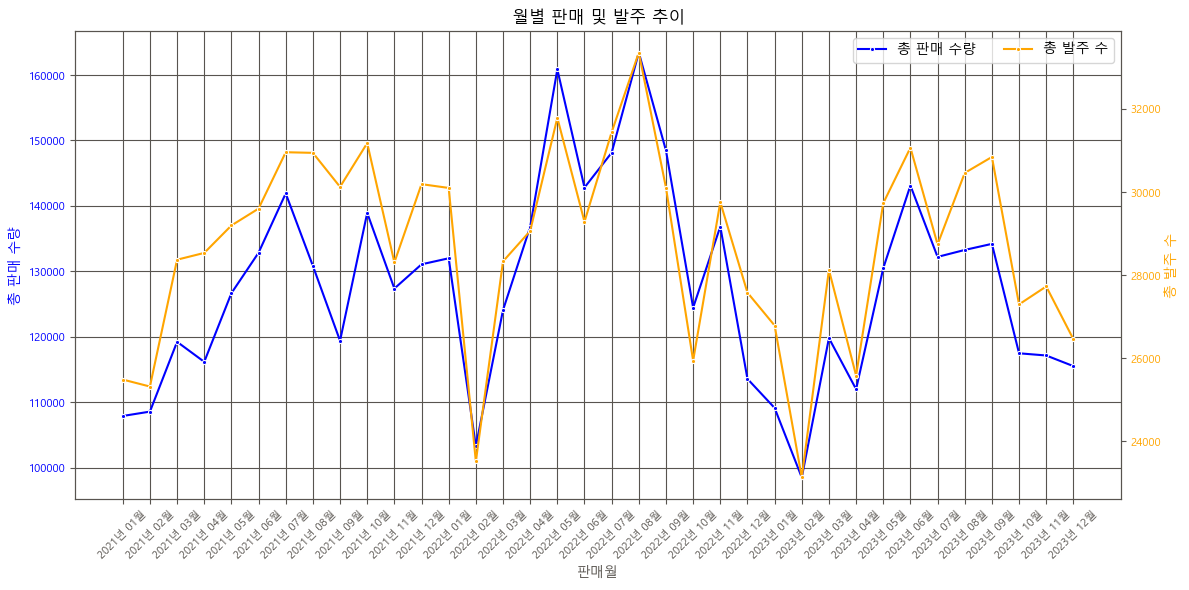

In [106]:
# 기본 그래프 설정
fig, ax1 = plt.subplots(figsize=(12, 6))
 
# 첫 번째 y축: 총 판매 수량
sns.lineplot(data=monthlysum_df1, x='판매월', y='총판매수량', marker='o', label='총 판매 수량', color='blue', ax=ax1,legend = False)
ax1.set_ylabel('총 판매 수량', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(monthlysum_df1['판매월'], rotation=45)  # x축 레이블 회전
ax1.grid()
 
# 두 번째 y축: 총 발주 수
ax2 = ax1.twinx()
sns.lineplot(data=monthlycnt_df1, x='판매월', y='총발주수', marker='o', label='총 발주 수', color='orange', ax=ax2)
ax2.set_ylabel('총 발주 수', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
 
# 범례 설정
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right', ncol=2)
 
# 제목 및 레이아웃 설정
plt.title('월별 판매 및 발주 추이')
fig.tight_layout()
plt.show()

In [86]:
print(monthlysum_df2.columns)

Index(['판매월', '총발주수'], dtype='object')


C:\Users\KMAC\AppData\Local\Temp\ipykernel_11132\1922141022.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(monthlysum_df2['판매월'], rotation=45)  # x축 레이블 회전


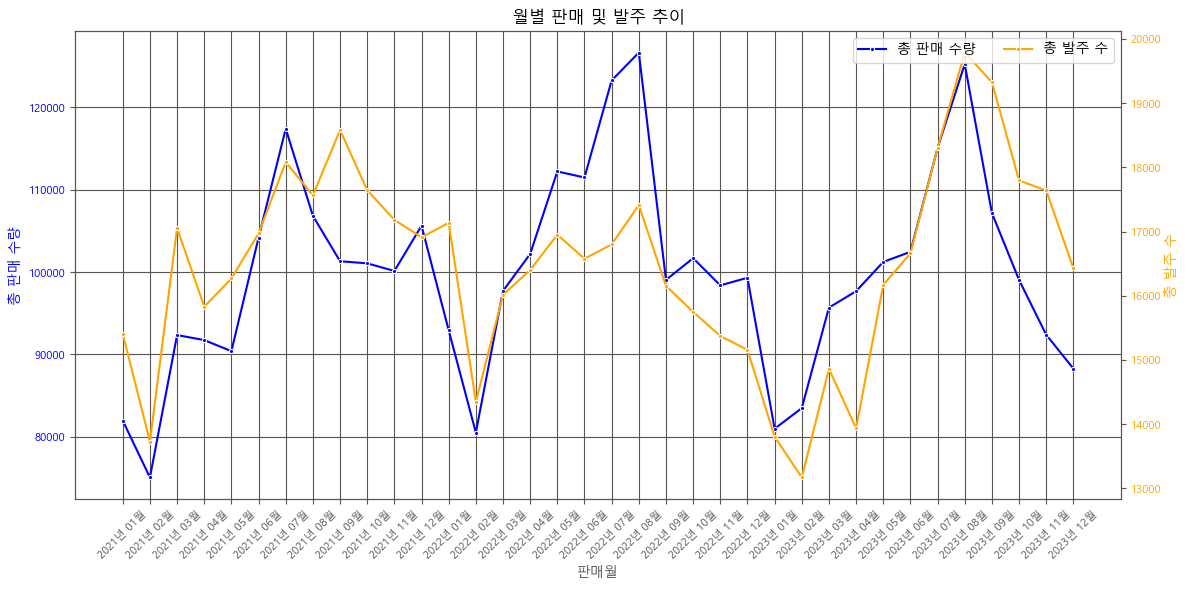

In [107]:
# 기본 그래프 설정
fig, ax1 = plt.subplots(figsize=(12, 6))
 
# 첫 번째 y축: 총 판매 수량
sns.lineplot(data=monthlysum_df2, x='판매월', y='총판매수량', marker='o', label='총 판매 수량', color='blue', ax=ax1, legend = False)
ax1.set_ylabel('총 판매 수량', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(monthlysum_df2['판매월'], rotation=45)  # x축 레이블 회전
ax1.grid()
 
# 두 번째 y축: 총 발주 수
ax2 = ax1.twinx()
sns.lineplot(data=monthlycnt_df2, x='판매월', y='총발주수', marker='o', label='총 발주 수', color='orange', ax=ax2)
ax2.set_ylabel('총 발주 수', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
 
# 범례 설정
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right', ncol=2)
 
# 제목 및 레이아웃 설정
plt.title('월별 판매 및 발주 추이')
fig.tight_layout()
plt.show()

In [119]:
# SQL 쿼리
query_r = '''
SELECT strftime('%Y년 %m월', 판매일) AS 판매월, 중분류, SUM(판매수량) AS 총판매수량
FROM union_df1
WHERE 중분류 IN (
SELECT 중분류
FROM union_df1
GROUP BY 중분류
ORDER BY SUM(판매수량) DESC
LIMIT 5
)
GROUP BY 판매월, 중분류
ORDER BY 판매월 
'''

# 쿼리 실행 및 결과를 데이터프레임으로 변환
monthly1_r_df = pd.read_sql_query(query_r, conn)

# 결과 출력
monthly1_r_df

,판매월,중분류,총판매수량
0,2021년 01월,가공식품류,15717
1,2021년 01월,"과자,씨리얼,초코릿,빵류",12887
2,2021년 01월,"라면,통조림,상온즉석",13911
3,2021년 01월,"생수,음료,건강",23426
4,2021년 01월,잡화,29259
...,...,...,...
175,2023년 12월,가공식품류,11081
176,2023년 12월,"과자,씨리얼,초코릿,빵류",9338
177,2023년 12월,"라면,통조림,상온즉석",15609
178,2023년 12월,"생수,음료,건강",41075


In [120]:
# SQL 쿼리
query_r = '''
SELECT strftime('%Y년 %m월', 판매일) AS 판매월, 대분류, SUM(판매수량) AS 총판매수량
FROM union_df2
WHERE 대분류 IN (
SELECT 대분류
FROM union_df2
GROUP BY 대분류
ORDER BY SUM(판매수량) DESC
LIMIT 5
)
GROUP BY 판매월, 대분류
ORDER BY 판매월 
'''

# 쿼리 실행 및 결과를 데이터프레임으로 변환
monthly2_r_df = pd.read_sql_query(query_r, conn)

# 결과 출력
monthly2_r_df

,판매월,대분류,총판매수량
0,2021년 01월,가공식품류,9589
1,2021년 01월,면류.라면류,8990
2,2021년 01월,빵.케익.과자류,6420
3,2021년 01월,"음료,차류",25912
4,2021년 01월,일상용품,7293
...,...,...,...
175,2023년 12월,가공식품류,8040
176,2023년 12월,면류.라면류,7647
177,2023년 12월,빵.케익.과자류,11321
178,2023년 12월,"음료,차류",34771


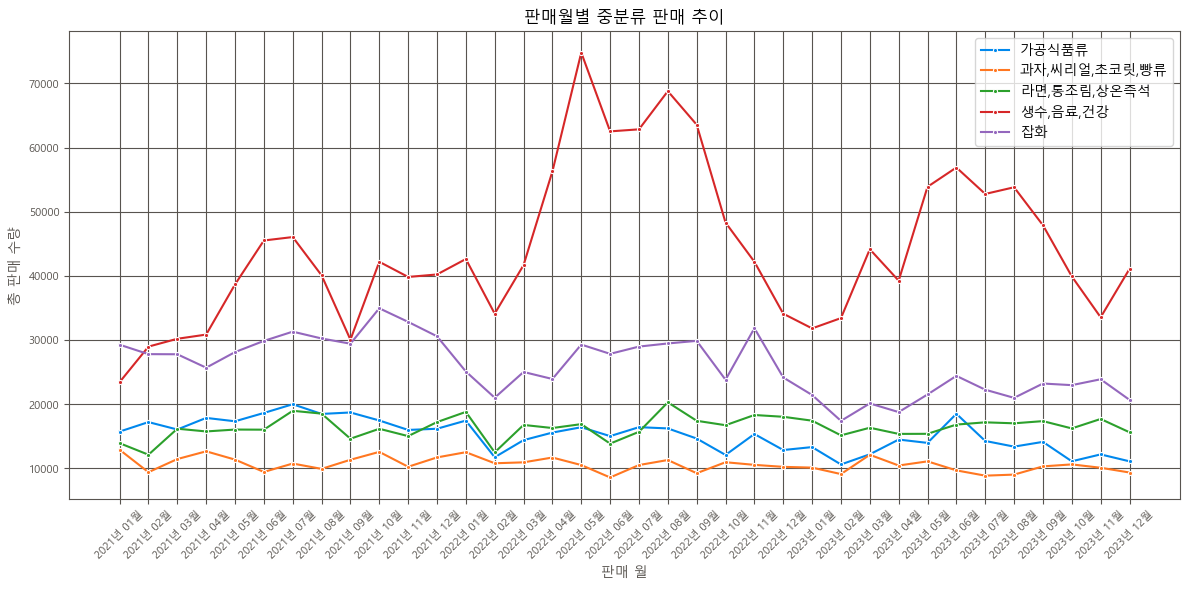

In [117]:
# 라인 그래프 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly1_r_df, x='판매월', y='총판매수량', hue='중분류', marker='o')
plt.title('판매월별 중분류 판매 추이')
plt.xlabel('판매 월')
plt.ylabel('총 판매 수량')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid()

# 범례를 오른쪽 위로 이동
plt.legend(loc='upper right')  # loc='upper right'로 범례 위치 설정

plt.tight_layout()
plt.show()

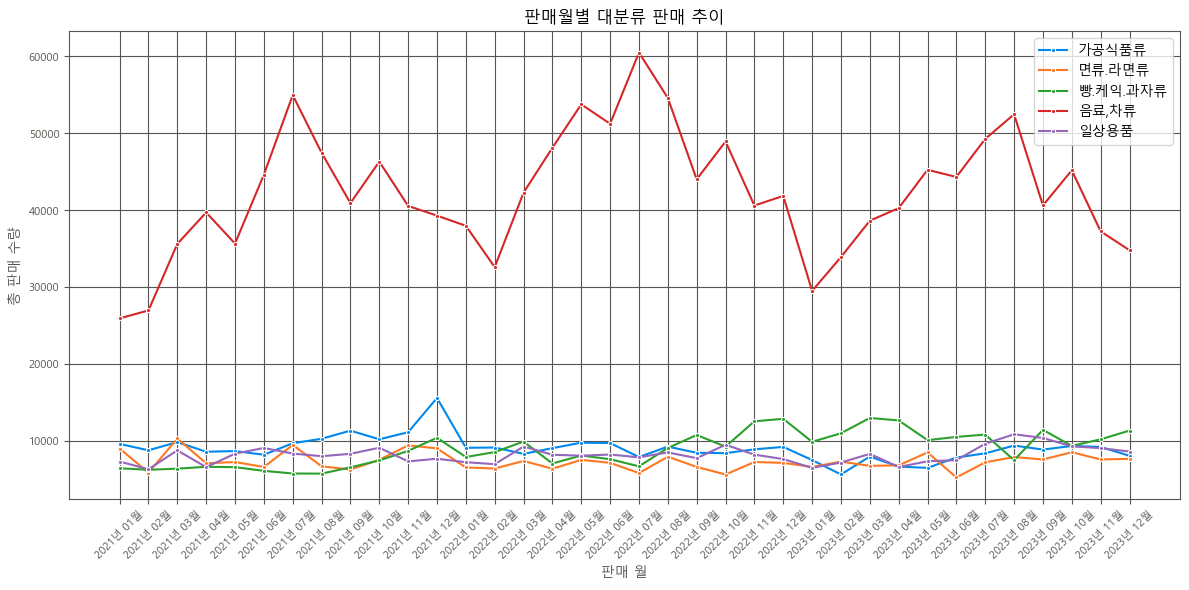

In [121]:
# 라인 그래프 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly2_r_df, x='판매월', y='총판매수량', hue='대분류', marker='o')
plt.title('판매월별 대분류 판매 추이')
plt.xlabel('판매 월')
plt.ylabel('총 판매 수량')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid()

# 범례를 오른쪽 위로 이동
plt.legend(loc='upper right')  # loc='upper right'로 범례 위치 설정

plt.tight_layout()
plt.show()

In [122]:
# SQL 쿼리
queryr2 = '''
SELECT 중분류, 옵션코드, COUNT(옵션코드) AS 발주수
FROM union_df1
WHERE 중분류 = '라면,통조림,상온즉석'
GROUP BY 중분류, 옵션코드
ORDER BY 발주수 DESC
'''

# 쿼리 실행 및 결과를 데이터프레임으로 변환
result_df2 = pd.read_sql_query(queryr2, conn)

# 결과 출력
result_df2

,중분류,옵션코드,발주수
0,"라면,통조림,상온즉석",BX,131040
1,"라면,통조림,상온즉석",EA,63659
2,"라면,통조림,상온즉석",CS,12245
3,"라면,통조림,상온즉석",C/S,140
4,"라면,통조림,상온즉석",CS1,68
5,"라면,통조림,상온즉석",BOX,41
6,"라면,통조림,상온즉석",BX1,10


C:\Users\KMAC\AppData\Local\Temp\ipykernel_11132\3122078770.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=result_df2, x='옵션코드', y='발주수', palette='viridis')


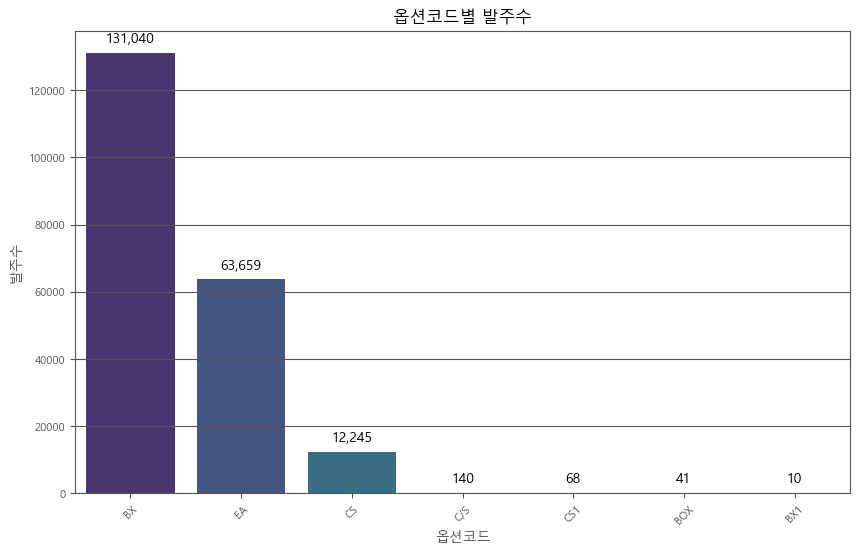

In [124]:
# 옵션코드별 발주수 시각화
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=result_df2, x='옵션코드', y='발주수', palette='viridis')

# 숫자 레이블 추가
for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height()), ','), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  # 바 위쪽에 위치
                      textcoords='offset points')

plt.title('옵션코드별 발주수')
plt.xlabel('옵션코드')
plt.ylabel('발주수')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [127]:
# SQL 쿼리
queryr22 = '''
SELECT 대분류, 옵션코드, COUNT(옵션코드) AS 발주수
FROM union_df2
WHERE 대분류 = '면류.라면류'
GROUP BY 대분류, 옵션코드
ORDER BY 발주수 DESC
'''

# 쿼리 실행 및 결과를 데이터프레임으로 변환
result_df22 = pd.read_sql_query(queryr22, conn)

# 결과 출력
result_df22

,대분류,옵션코드,발주수
0,면류.라면류,CS,52284
1,면류.라면류,EA,29030
2,면류.라면류,BX,1233
3,면류.라면류,BX2,162


C:\Users\KMAC\AppData\Local\Temp\ipykernel_11132\4101256523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=result_df22, x='옵션코드', y='발주수', palette='viridis')


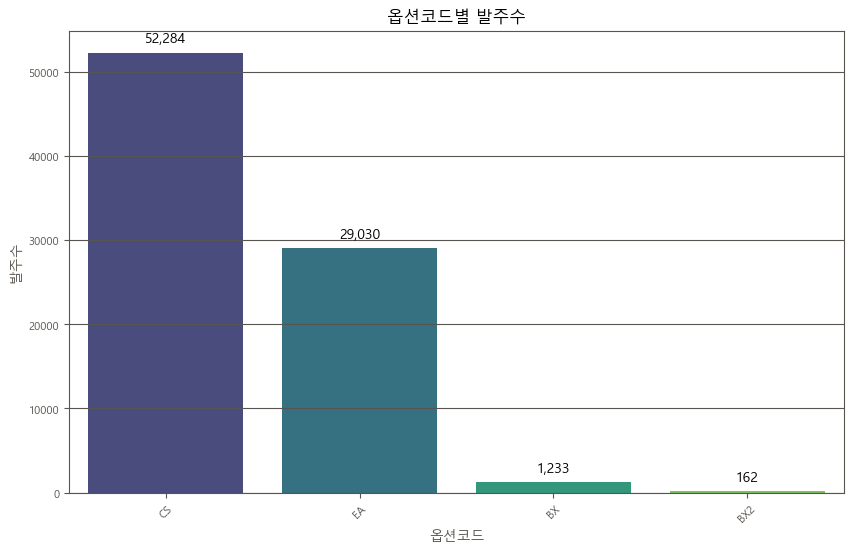

In [128]:
# 옵션코드별 발주수 시각화
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=result_df22, x='옵션코드', y='발주수', palette='viridis')

# 숫자 레이블 추가
for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height()), ','), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  # 바 위쪽에 위치
                      textcoords='offset points')

plt.title('옵션코드별 발주수')
plt.xlabel('옵션코드')
plt.ylabel('발주수')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [137]:
# SQL 쿼리
query_r = '''
    SELECT DISTINCT 판매일,우편번호, 매출처코드
    FROM union_df1
'''

# 쿼리 실행 및 결과를 데이터프레임으로 변환
a_df2 = pd.read_sql_query(query_r, conn)

# 결과 출력
a_df2

,판매일,우편번호,매출처코드
0,2021-01-04 00:00:00,37542,8
1,2021-01-04 00:00:00,37544,95
2,2021-01-04 00:00:00,37559,105
3,2021-01-04 00:00:00,37560,2173
4,2021-01-04 00:00:00,37575,2141
...,...,...,...
51416,2023-12-29 00:00:00,38002,167
51417,2023-12-29 00:00:00,38004,141
51418,2023-12-29 00:00:00,38004,2213
51419,2023-12-29 00:00:00,38131,2235


In [142]:
# SQL 쿼리
query_r = '''
WITH 일괄주문제거 AS(
    SELECT DISTINCT 판매일,우편번호, 매출처코드
    FROM union_df1
)
,지역별_우편번호 AS (
    SELECT '서울' AS 지역명, 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '01' AND '09'
    UNION ALL
    SELECT '경기', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '10' AND '20'
    UNION ALL
    SELECT '인천', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '21' AND '23'
    UNION ALL
    SELECT '강원', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '24' AND '26'
    UNION ALL
    SELECT '충북', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '27' AND '29'
    UNION ALL
    SELECT '세종', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) = '30'
    UNION ALL
    SELECT '충남', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '31' AND '33'
    UNION ALL
    SELECT '대전', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '34' AND '35'
    UNION ALL
    SELECT '경북', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '36' AND '40'
    UNION ALL
    SELECT '대구', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '41' AND '43'
    UNION ALL
    SELECT '울산', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '44' AND '45'
    UNION ALL
    SELECT '부산', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '46' AND '49'
    UNION ALL
    SELECT '경남', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '50' AND '53'
    UNION ALL
    SELECT '전북', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '54' AND '56'
    UNION ALL
    SELECT '전남', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '57' AND '60'
    UNION ALL
    SELECT '광주', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '61' AND '62'
    UNION ALL
    SELECT '제주', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) = '63'
)

SELECT 
    지역명, 
    COUNT(우편번호) AS 발주수
FROM 
    지역별_우편번호
GROUP BY 
    지역명
ORDER BY 
    발주수 DESC
'''

# 쿼리 실행 및 결과를 데이터프레임으로 변환
a_df2 = pd.read_sql_query(query_r, conn)

# 결과 출력
a_df2

,지역명,발주수
0,경북,51158
1,경남,260
2,강원,3


In [143]:
# SQL 쿼리
query_r = '''
WITH 일괄주문제거 AS(
    SELECT DISTINCT 판매일,우편번호, 매출처코드
    FROM union_df2
),
지역별_우편번호 AS (
    SELECT '서울' AS 지역명, 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '01' AND '09'
    UNION ALL
    SELECT '경기', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '10' AND '20'
    UNION ALL
    SELECT '인천', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '21' AND '23'
    UNION ALL
    SELECT '강원', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '24' AND '26'
    UNION ALL
    SELECT '충북', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '27' AND '29'
    UNION ALL
    SELECT '세종', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) = '30'
    UNION ALL
    SELECT '충남', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '31' AND '33'
    UNION ALL
    SELECT '대전', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '34' AND '35'
    UNION ALL
    SELECT '경북', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '36' AND '40'
    UNION ALL
    SELECT '대구', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '41' AND '43'
    UNION ALL
    SELECT '울산', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '44' AND '45'
    UNION ALL
    SELECT '부산', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '46' AND '49'
    UNION ALL
    SELECT '경남', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '50' AND '53'
    UNION ALL
    SELECT '전북', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '54' AND '56'
    UNION ALL
    SELECT '전남', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '57' AND '60'
    UNION ALL
    SELECT '광주', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) BETWEEN '61' AND '62'
    UNION ALL
    SELECT '제주', 우편번호 
    FROM 일괄주문제거 WHERE SUBSTR(우편번호, 1, 2) = '63'
)

SELECT 
    지역명, 
    COUNT(우편번호) AS 발주수
FROM 
    지역별_우편번호
GROUP BY 
    지역명
ORDER BY 
    발주수 DESC
'''

# 쿼리 실행 및 결과를 데이터프레임으로 변환
a_df22 = pd.read_sql_query(query_r, conn)

# 결과 출력
a_df22

,지역명,발주수
0,경남,42613
1,대구,2428
2,제주,511
3,부산,224
4,경북,44
5,전북,41
6,대전,33
7,경기,17
8,광주,10
9,울산,2
